# Importing relevant libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing dataset

In [2]:
train =pd.read_csv('train.csv')
train.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test =pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# Checking for null values

In [5]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

#Removing null values

In [7]:
train = train.dropna()
test  = test.dropna()

In [8]:
train.isnull().sum().sum()
test.isnull().sum().sum()

0

#  Boxplot of Age by VIP Status

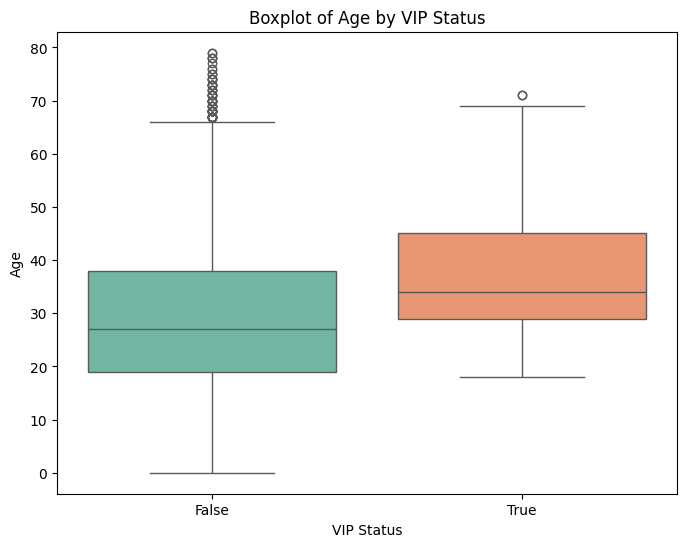

In [9]:

plt.figure(figsize=(8, 6))
sns.boxplot(data=train, x='VIP', y='Age', palette='Set2')
plt.title('Boxplot of Age by VIP Status')
plt.xlabel('VIP Status')
plt.ylabel('Age')
plt.show()

# Scatter Plot of Age vs. Room Service Usage

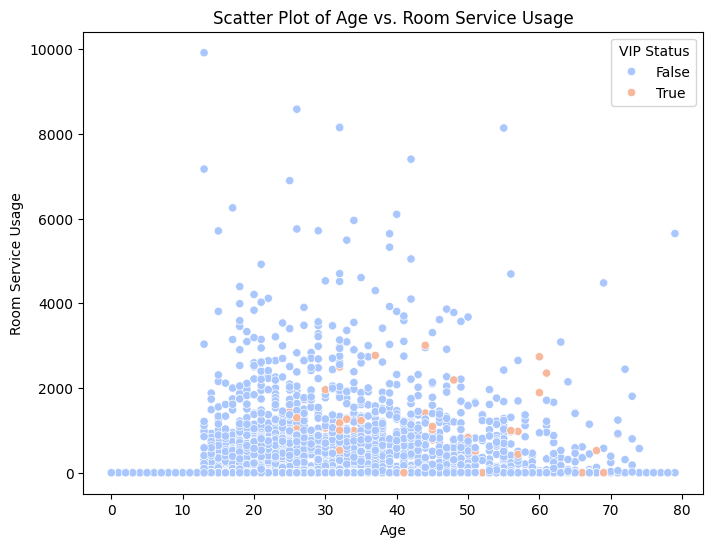

In [10]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Age', y='RoomService', hue='VIP', palette='coolwarm')
plt.title('Scatter Plot of Age vs. Room Service Usage')
plt.xlabel('Age')
plt.ylabel('Room Service Usage')
plt.legend(title='VIP Status')
plt.show()

#Count of Passengers by Destination

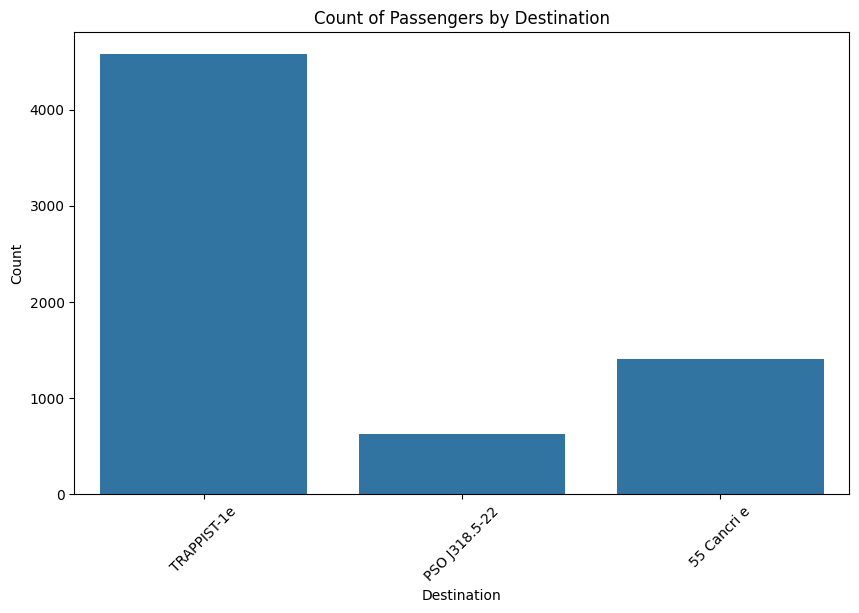

In [11]:

plt.figure(figsize=(10, 6))
sns.countplot(data=train, x='Destination')
plt.title('Count of Passengers by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

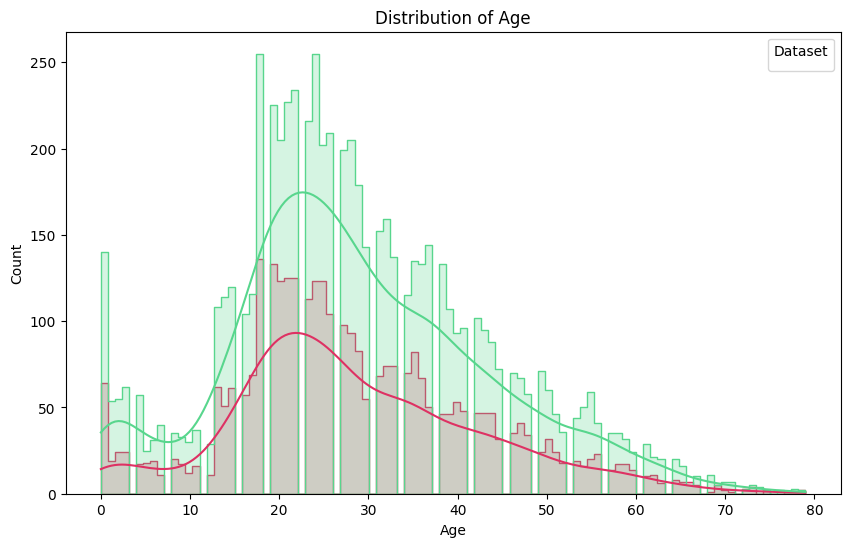

In [12]:
# Concatenating train and test datasets
ageDf = pd.concat([train.assign(type='Train'), test.assign(type='Test')])

# Plotting histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=ageDf, x='Age', hue='type', palette=['#58D68D', '#DE3163'], element='step', bins=100, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Dataset')
plt.show()


#correlation matrix

In [13]:
fig = px.imshow(train.corr() ,text_auto=True, aspect="auto" , color_continuous_scale = "viridis")
fig.show()

# Preparing dataset for implementing machine learning algorithms

In [14]:
train.drop(["PassengerId"] , axis = 1 , inplace = True)
test.drop(["PassengerId"] , axis = 1 , inplace = True)

In [15]:
train[['HomePlanet']]=train[['HomePlanet']].apply(lambda col:pd.Categorical(col).codes)
train[['CryoSleep']]=train[['CryoSleep']].apply(lambda col:pd.Categorical(col).codes)
train[['Cabin']]=train[['Cabin']].apply(lambda col:pd.Categorical(col).codes)
train[['Destination']]=train[['Destination']].apply(lambda col:pd.Categorical(col).codes)
train[['VIP']]=train[['VIP']].apply(lambda col:pd.Categorical(col).codes)
train[['Name']]=train[['Name']].apply(lambda col:pd.Categorical(col).codes)
train[['Transported']]=train[['Transported']].apply(lambda col:pd.Categorical(col).codes)


In [16]:
X= train.drop(['Transported'], axis=1)
y= train[['Transported']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.25, random_state=42)

# KNN

In [18]:
knn = KNeighborsClassifier(n_neighbors=7)

In [19]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [20]:
y_pred = knn.predict(X_test)

In [21]:
print(knn.score(X_test, y_test))

0.7621065375302664


In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       813
           1       0.74      0.82      0.78       839

    accuracy                           0.76      1652
   macro avg       0.76      0.76      0.76      1652
weighted avg       0.76      0.76      0.76      1652



# Random Forest

In [23]:
forest_random = RandomForestClassifier(n_estimators = 40)

In [24]:
forest_random.fit(X_train, y_train)

RandomForestClassifier(n_estimators=40)

In [25]:
y_pred = forest_random.predict(X_test)

In [26]:
confusion_matrix(y_test, y_pred)

array([[660, 153],
       [188, 651]])

In [27]:
accuracy_score(y_test, y_pred)

0.7935835351089588

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       813
           1       0.81      0.78      0.79       839

    accuracy                           0.79      1652
   macro avg       0.79      0.79      0.79      1652
weighted avg       0.79      0.79      0.79      1652



# Decision Tree

In [29]:
dtc = DecisionTreeClassifier()

In [30]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = dtc.predict(X_test)

In [32]:
confusion_matrix(y_test, y_pred)

array([[575, 238],
       [209, 630]])

In [33]:
accuracy_score(y_test, y_pred)

0.7294188861985472

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       813
           1       0.73      0.75      0.74       839

    accuracy                           0.73      1652
   macro avg       0.73      0.73      0.73      1652
weighted avg       0.73      0.73      0.73      1652



[Text(0.6975473785644242, 0.9827586206896551, 'x[1] <= 0.5\ngini = 0.5\nsamples = 4954\nvalue = [2466, 2488]'),
 Text(0.4711357163030869, 0.9482758620689655, 'x[7] <= 1331.0\ngini = 0.444\nsamples = 3211\nvalue = [2141, 1070]'),
 Text(0.2519376578926904, 0.9137931034482759, 'x[4] <= 12.5\ngini = 0.413\nsamples = 2768\nvalue = [1960, 808]'),
 Text(0.02492466097438473, 0.8793103448275862, 'x[2] <= 3779.5\ngini = 0.446\nsamples = 235\nvalue = [79, 156]'),
 Text(0.007305602483904845, 0.8448275862068966, 'x[0] <= 0.5\ngini = 0.11\nsamples = 86\nvalue = [5, 81]'),
 Text(0.005844481987123876, 0.8103448275862069, 'x[11] <= 5427.0\ngini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(0.002922240993561938, 0.7758620689655172, 'x[3] <= 1.5\ngini = 0.266\nsamples = 19\nvalue = [3, 16]'),
 Text(0.001461120496780969, 0.7413793103448276, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.004383361490342907, 0.7413793103448276, 'x[11] <= 4304.0\ngini = 0.397\nsamples = 11\nvalue = [3, 8]'),
 Text(0.0

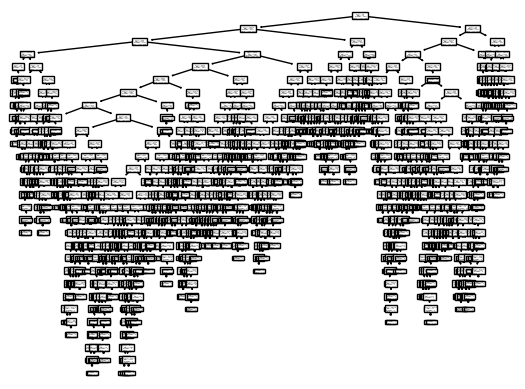

In [35]:
tree.plot_tree(dtc)

# Logistic Regression

In [36]:
lrc = LogisticRegression(random_state = 0)

In [37]:
lrc.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred = lrc.predict(X_test)

In [39]:
confusion_matrix(y_test, y_pred)

array([[585, 228],
       [133, 706]])

In [40]:
accuracy_score(y_test, y_pred)

0.7814769975786925

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       813
           1       0.76      0.84      0.80       839

    accuracy                           0.78      1652
   macro avg       0.79      0.78      0.78      1652
weighted avg       0.78      0.78      0.78      1652

